For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __Josh Alter, Robert Chatterton__

Step 1: Word2Vec paper questions
---------------------------
### Describe how a CBOW word embedding is generated.
- from section 3.1: A CBOW word embedding is generated by taking words within a ceratain window around the target word and creating a vector representing the context of that given target word.

### What is a CBOW word embedding and how is it different from a skip-gram word embedding?
- figure 1: The CBOW architecture predicts the current word based on the context, and the Skip-gram predicts surrounding words given the current word. These embeddings are mirrors. The CBOW word embedding is meant to help generate the words surround that embedding (And thus is optimized to do that), whereas the skip-gram word embedding is made to generate the word given multiple context word embeddings. This means that those embeddings will be optimized for preidction of a missing word given this context.

### What is the task that the authors use to evaluate the generated word embeddings?
- section 4.1: we hate to reference such a large chunk from the paper, but its description of the task is incredibly digestable: "Overall, there are 8869 semantic and 10675 syntactic questions. The questions in each category were created in two steps: first, a list of similar word pairs was created manually. Then, a large list of questions is formed by connecting two word pairs. For example, we made a list of 68 large American cities and the states they belong to, and formed about 2.5K questions by picking two word pairs at random. We have included in our test set only single token words, thus multi-word entities are not present (such as New York). We evaluate the overall accuracy for all question types, and for each question type separately (semantic, syntactic). Question is assumed to be correctly answered only if the closest word to the vector computed using the above method is exactly the same as the correct word in the question; synonyms are thus counted as mistakes." 
- They essentially just ask certain types of questions and carefully assess the answers comparing these results of their models to that of older models. Funny enough their new model alone did not perform better over, in fact they had to merge an older model with their new one to break the record. 

### What are PCA and t-SNE? Why are these important to the task of training and interpreting word embeddings?
- A really good comparison of the two dimentionality reduction visualization techniques is done here 'https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/' 
- these are really important because they allow us to compare generated embeddings in a dimensionality space we can understand. This lets us contrsuct models that can be interpretted more easily. 

Step 2: Train your own word embeddings
--------------------------------

Spooky Authors Dataset
 - The spooky Authors Data set seems to be a compilation of text from horror stories by Edgar Allan Poe, Mary Shelley, and HP Lovecraft.
 
Describe what data set you have chosen to compare and contrast with the Spooky Authors Dataset. Make sure to describe where it comes from and it's general properties.
 - We thought it best to compare this set of written text with that of an older, but just as well known set of stories - Shakespeare. We hope that there will more more symmetry between these two than that of text from some other medium (TV, reviews, etc...). We are also interested in analyzing how the morphology of some words has changed between Shakespeare's (1564-1616) era and that of someone like Edgar Allen Poe (1809-1849). Our Shakespeare dataset is his complete work of plays. Because each plays' genre certainly differs from the horror of the spooky set we look to see how a variation of genre compares to that of a single. Below is a link to where we found our Dataset
 - https://www.kaggle.com/kingburrito666/shakespeare-plays
 
When training these word-embeddings, make reasonable decisions regarding text-normalization and pre-processing and describe what you have done.
 - we decided what we do to one we must do to the other, naturally. We tokenized every line of both datasets with nltk's word tokenize function. Then we case folded and removed all non alphabetic tokens. This was done to both as we look to assume that case of word shouldnt alter its meaning too heavily. We also assume that a non-alphabetic token wont be meaningful in any way for us.

In [1]:
# import your libraries here
import gensim
import numpy as np
import nltk

### a) Train embedding on GIVEN dataset

In [2]:
# code to train your word embeddings

# Read the file 'spooky-author-identification/train.csv' and prepare the training data in the following format
# imports
import csv

# code to train your word embeddings
sentences = []

with open("./train.csv", encoding="utf-8") as f:
    reader = csv.reader(f)
    for line in reader:
        tokenized = nltk.word_tokenize(line[1]) #tokenize
        no_punc = [word.lower() for word in tokenized if word.isalpha()] # remove non alphabetic chars and convert to all lowercase
        
        sentences.append(no_punc)
        
f.close()

In [3]:
from gensim.models import Word2Vec

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Training Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDING_SIZE
# min_count = 1

spooky_model = Word2Vec(sentences=sentences, window=5, size=EMBEDDINGS_SIZE, min_count=1, sg=1)
spooky_model.save("word2vec_sooky.model")

In [4]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(spooky_model.wv.vocab)))

Vocab size 24978


In [5]:
for key in spooky_model.wv.vocab.keys():
    print(key)
    break

text


In [6]:
# You can save file in txt format, then load later if you wish.
spooky_model.wv.save_word2vec_format('embeddings.txt', binary=False)

### b) Train embedding on YOUR dataset

In [7]:
# then do a second data set

In [8]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to C:\Users\Robert
[nltk_data]     Chatterton\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [9]:
# code to train your word embeddings
sentences_shakespeare = []

with open("./Shakespeare_data.csv", encoding="utf-8") as f:
    reader = csv.reader(f)
    for line in reader:
        tokenized = nltk.word_tokenize(line[5]) #tokenize
        no_punc = [word.lower() for word in tokenized if word.isalpha()] # remove non alphabetic chars and convert to all lowercase
        
        sentences_shakespeare.append(no_punc)
        
f.close()

# print(sentences[2:12])

In [10]:
# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Training Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. But feel free to explore other 
# options too:
# sg = 1
# window = 5
# size = EMBEDDING_SIZE
# min_count = 1

speare_model = Word2Vec(sentences=sentences_shakespeare, window=5, size=EMBEDDINGS_SIZE, min_count=1, sg=1)
speare_model.save("word2vec_speare.model")

In [11]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size {}'.format(len(speare_model.wv.vocab)))

Vocab size 22023


In [12]:
# print out the first word with an associated embedding in the model trained on the given data

for key in speare_model.wv.vocab.keys():
    print(key)
    break

playerline


In [13]:
# You can save file in txt format, then load later if you wish.
speare_model.wv.save_word2vec_format('embeddings_mine.txt', binary=False)

Step 3: Evaluate the differences between the word embeddings
----------------------------
Produce any graphs or figures that illustrate what you have found and write 2 - 3 paragraphs describing the differences and why you see them.
#### Using these two graphs we can visualize the main differences between these two datasets, genre and time period. 
#### Paragraph 1 - difference 1 based on genre
  - A good word to represetn this difference is 'cry'. We can do this only because we know beforehand the resepective genre breakdowns and We're not sure it would be obvious based on any certain word the genre of the text for other datasets. The closest neighbors of 'cry' in the spooky_model are recognised, heat, ligeia, shrieked, daylight and scream. The nearest neighbors of 'cry' in the speare_model are forsake, withdraw, determine, song, confound and tales. When comparing these two word lists we can see that shrieked and scream appear next to cry implying that people are crying in the same situations that they would be screaming and shrieking; this is something you would see in a horror stroy. Conversly we see cry associated with song and tales in shakespeare indicating that cry is used here as verb describing how verses are expressed. This is an interesting way to identify different genres of text. 
  
#### Paragraph 2 - difference 2 based on time period
  - A good word to represent this difference is 'to'. The closest neighbors of 'to' in the spooky_model are making, would, take, change, desire, and him. The closest neighbors of 'to' in the speare_model are thither, freely, unto, bids, yourselves, and directly. Intuitively you can posit this, but with TSNE we can easily visualize how the past few hundred years have forced changes to the English Language. The word 'to' is obviously here to stay, but who knows what other words will have similar meanings in 100 years. 


In [14]:
# test of cosine difference between two word embeddings 
# the degree distance each embedding if they were to be graphed in a high dimensional space
print(spooky_model.wv.similarity('they', 'we'))
print(speare_model.wv.similarity('they', 'we'))

0.6601321
0.7352043


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

In [16]:
# check to see if we need to normalize more. Ideally the similar words should not be the same word in another 
# form (i.e. 'he' and 'He')

print(spooky_model['he']) # word embedding of 'he' from first trained model 
print(spooky_model.similar_by_word('he')) # all similar words (n-similar) to 'he'
print(speare_model['he']) # word embedding of 'he' from second training model
print(speare_model.similar_by_word('he')) # all similar words (n-similar) to 'he'

[-0.04464763  0.2317154  -0.15386432  0.10081241 -0.10362487  0.18057637
 -0.09024871 -0.48174432 -0.45373887  0.01797479  0.20947967  0.27366617
 -0.04766431 -0.0673878   0.32945946 -0.3215134   0.33892027  0.04526712
  0.20038366  0.17237233 -0.33902717 -0.02810762 -0.2412441   0.25235513
 -0.05693242  0.44157818 -0.1102667  -0.26145124  0.03851573  0.17713201
 -0.00409068  0.17602332 -0.2121416  -0.41702142  0.06196535  0.22324207
 -0.16569753  0.05778773 -0.13316539 -0.17970489 -0.00182216  0.13275032
  0.30225018 -0.2597866  -0.25130367  0.11290174  0.11804923  0.33036435
 -0.23246264  0.08995044  0.04524405 -0.04028279  0.04762954 -0.03776636
  0.0681027   0.16787411 -0.02587365  0.17487611 -0.17335469  0.11689661
 -0.22668429  0.32606992 -0.06698465  0.25116476  0.42903167 -0.30857646
 -0.3429984   0.18879513  0.03508647  0.08223458 -0.34466213  0.25243407
  0.16872719  0.2546734  -0.19397488  0.25973642 -0.2842471   0.05044419
 -0.23601805  0.13622817  0.03047802  0.0224433   0

<ipython-input-16-f4e33e052854>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(spooky_model['he']) # word embedding of 'he' from first trained model
<ipython-input-16-f4e33e052854>:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  print(spooky_model.similar_by_word('he')) # all similar words (n-similar) to 'he'
<ipython-input-16-f4e33e052854>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(speare_model['he']) # word embedding of 'he' from second training model
<ipython-input-16-f4e33e052854>:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  print(speare_model.similar_by_word('he')) # all similar words (n-similar) to 'he'


In [17]:
# plotting TSNE with a given model and word
# reducing this high dimensionality data representation to a 2d graph
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,200), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<ipython-input-17-22c3db3fcd59>:9: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  close_words = model.similar_by_word(word)
<ipython-input-17-22c3db3fcd59>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)
<ipython-input-17-22c3db3fcd59>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  wrd_vector = model[wrd_score[0]]


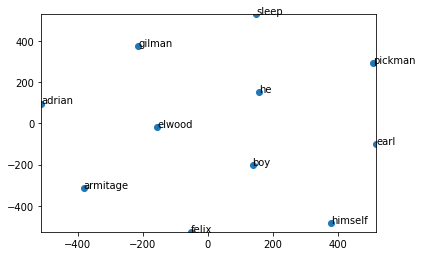

In [18]:
# plot with first model of some word ('he')
plt.cla()
display_closestwords_tsnescatterplot(spooky_model, 'he')

<ipython-input-17-22c3db3fcd59>:9: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  close_words = model.similar_by_word(word)
<ipython-input-17-22c3db3fcd59>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)
<ipython-input-17-22c3db3fcd59>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  wrd_vector = model[wrd_score[0]]


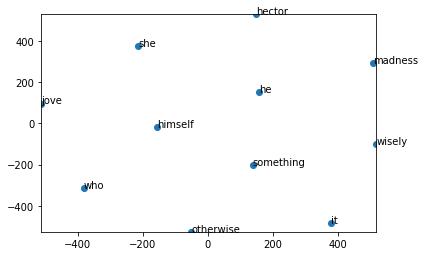

In [19]:
# plot with first model of some word ('he') - **FIXME** overwrites first plot 
plt.cla()
display_closestwords_tsnescatterplot(speare_model, 'he')

Cite your sources: https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
-------------

Step 4: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [20]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Input

NGRAM = 3 # The size of the ngram language model you want to train

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
data_1 = sentences
tokenizer_1 = Tokenizer()
tokenizer_1.fit_on_texts(data_1)
encoded_1 = tokenizer_1.texts_to_sequences(data_1)

data_2 = sentences_shakespeare
tokenizer_2 = Tokenizer()
tokenizer_2.fit_on_texts(data_2)
encoded_2 = tokenizer_2.texts_to_sequences(data_2)

# Make sure to include the padding token in your vocabulary size - NN

### b) Next, prepare your sequences from text

#### Fixed ngram based sequences (Used for Feedforward)

In [21]:
def generate_ngram_training_samples(model, encoded_data, n=3): #where n is the context words or n-gram - 1
    '''
    Takes the encoded data (list of lists) and generates the training samples
    out of it.
    Parameters:
    up to you!
    return: list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    samples = list()
    for sentence in encoded_data:
        if len(sentence) < n or sentence == [] or sentence == None:
            continue
        #print(sentence)
        for i in range(n, len(sentence)):
            tmp_sample_words = [model.wv.index2word[idx] for idx in sentence[i-n:i]] # gets n-1 gram in encoded and converts
            samples.append(tmp_sample_words)
    return samples

In [22]:
print(len(encoded_1))
x = generate_ngram_training_samples(spooky_model, encoded_1[:-3])
for l in x:
    print(l)
    break

19580
['on', 'sixteen', 'thing']


### c) Then, split the sequences into X and y and create a Data Generator

In [23]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]
def split_samples(ngram_samples, n=NGRAM):
    '''
    Splits a list of lists of ngrams into a list of lists of n-1 grams, followed by the corresponding array of y-values
    '''
    splits = []
    y = []
    for gram in ngram_samples:
        x = gram[:n - 1]
        splits.append(x)
        y.append(gram[n - 1])
    splits.append(y)
    return splits

In [24]:
def read_embeddings(model):
    '''Loads and parses embeddings trained in earlier.'''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':1, ...}
    # index to embedding : {1:'the', ...} (inverse of word_2_embedding)
    word_to_embedding = {}
    index_to_embedding = {}
    for i in range(len(model.wv.vocab)):
        word = model.wv.index2word[i]
        
        word_to_embedding[word] = (i, model[word])
        index_to_embedding[i] = (word, model[word])

    return word_to_embedding, index_to_embedding

# remember that "0" index is assigned for padding token. 
# Hence, initialize the vector for padding token as all zeros of embedding size

In [25]:
def data_generator(X, y, num_sequences_per_batch, steps_per_epoch, model):
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels (see the to_categorical function)
    Thanks for the help in OH!
    '''
    we, ie = read_embeddings(model)
    final_X = []
    final_y = []
    while(True):
        for i in range(len(X)):
            if len(final_X) == num_sequences_per_batch:
                yield np.array(final_X), np.array(final_y)
                final_X, final_y = [], []
            
            eL = [we[word][1] for word in X[i]]
            cEL = np.concatenate(eL)
            final_X.append(cEL)
            yOneHot = to_categorical(we[y[i]][0], num_classes=len(ie))
            final_y.append(yOneHot)
        

In [26]:
num_sequences_per_batch = 1024 # or Batch Size

# initialize data_generator for spooky model
spooky_vsize = len(spooky_model.wv.vocab)
spooky_sequences = generate_ngram_training_samples(spooky_model, encoded_1[:-3])
X_spooky = split_samples(spooky_sequences)[:-1]
y_spooky = split_samples(spooky_sequences)[-1]
steps_per_epoch_spooky = len(spooky_sequences) // num_sequences_per_batch  # Number of batches per epoch
train_generator_spooky = data_generator(X_spooky, y_spooky, num_sequences_per_batch, steps_per_epoch_spooky, spooky_model)

# initialize data_generator for Shakespeare model
speare_vsize = len(speare_model.wv.vocab)
speare_sequences = generate_ngram_training_samples(speare_model, encoded_2[:-3])
X_speare = split_samples(speare_sequences)[:-1]
y_speare = split_samples(speare_sequences)[-1]
steps_per_epoch_speare = len(speare_sequences) // num_sequences_per_batch  # Number of batches per epoch
train_generator_speare = data_generator(X_speare, y_speare, num_sequences_per_batch, steps_per_epoch_speare, speare_model)

sample=next(train_generator_spooky) # this is how you get data out of generators
print("X shape: ", sample[0].shape) # (batch_size, (n-1)*EMBEDDING_SIZE)
print("y shape: ", sample[1].shape) 

<ipython-input-24-3b154f87a5e3>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_to_embedding[word] = (i, model[word])
<ipython-input-24-3b154f87a5e3>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  index_to_embedding[i] = (word, model[word])


X shape:  (1024, 400)
y shape:  (1024, 24978)


### d) Train your models

In [27]:
from tensorflow.keras import layers

In [28]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two 
def create_model(embedding_model):
    model = Sequential()
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(embedding_model.wv.vocab), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Defining the model architecture using Keras Sequential API
modelSpooky = create_model(spooky_model)
modelSpeare = create_model(speare_model)

### Train models

In [29]:
# train.csv model
modelSpooky.fit_generator(train_generator_spooky, 
                    steps_per_epoch=steps_per_epoch_spooky,
                    epochs=1)

Instructions for updating:
Please use Model.fit, which supports generators.
452/452 [==============================] - 163s 361ms/step - loss: 7.0672 - accuracy: 0.0824


In [30]:
# Shakespeare_data.csv model
modelSpeare.fit_generator(train_generator_speare, 
                    steps_per_epoch=steps_per_epoch_speare,
                    epochs=1)

<ipython-input-24-3b154f87a5e3>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_to_embedding[word] = (i, model[word])
<ipython-input-24-3b154f87a5e3>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  index_to_embedding[i] = (word, model[word])


470/470 [==============================] - 143s 304ms/step - loss: 6.7289 - accuracy: 0.0459


In [31]:
modelSpooky.summary()
modelSpeare.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                25664     
_________________________________________________________________
dense_1 (Dense)              (None, 24978)             1623570   
Total params: 1,649,234
Trainable params: 1,649,234
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                25664     
_________________________________________________________________
dense_3 (Dense)              (None, 22023)             1431495   
Total params: 1,457,159
Trainable params: 1,457,159
Non-trainable params: 0
_________________________________________________________________


### e) Generate Sentences

In [32]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed, n_words, we):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    vocab = [k for k, v in we.items()]
    sentence = seed
    vect = calc_vec(seed, we)
    prev = sentence
    for w in range(n_words - len(seed)):
        probs = model.predict(vect)[0]
        prediction = np.random.choice(vocab, p=probs)
        sentence.append(prediction)
        prev = sentence[-(NGRAM - 1):]
        vect = calc_vec(prev, we)
    return ' '.join(sentence) + '.'

def calc_vec(words, we):
    vecs = []
    for w in words:
        vecs.append(we[w][1])
    vect = np.concatenate(vecs)
    vect = np.reshape(vect, (1,400))
    return vect

### Generate Sentences:

In [33]:
weSpook, ieSpook = read_embeddings(spooky_model)
weSpeare, ieSpeare = read_embeddings(speare_model)
sents_spooky = []
sents_speare = []
for i in range(50):
    sents_spooky.append(generate_seq(modelSpooky, tokenizer_1, ["we", "are"], 20, weSpook))
    sents_speare.append(generate_seq(modelSpeare, tokenizer_2, ["we", "are"], 20, weSpeare))

<ipython-input-24-3b154f87a5e3>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_to_embedding[word] = (i, model[word])
<ipython-input-24-3b154f87a5e3>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  index_to_embedding[i] = (word, model[word])


### f) Compare your generated sentences

In [34]:
print("\nspooky sentences:")
[print(str(i + 1) + ": ", s) for i, s in enumerate(sents_spooky)]

print("\nshakespeare sentences")
[print(str(i + 1) + ": ", s) for i, s in enumerate(sents_speare)]

print("\nfinished generating.")


spooky sentences:
1:  we are change and it portion tottering i value my in wars peasants return had my of duke i pervaded.
2:  we are dank and new our long and of quasi hands to heat fallen and of canopy to foster is.
3:  we are centre to continue averted and preparations them he and at this own my with strove to which solid.
4:  we are number some for an deter separate as had tale turned born if to rest that with mutter management.
5:  we are over me reflection i he curious me some silence once submit my then life home i would its.
6:  we are harp and italian an sworn me of these aside for by very of receiving his was undeceive for.
7:  we are enchanted from as stronger beneath walking at to escaping gloom with among contradictory and companions had alive which.
8:  we are moor i are pieces was speak principles is of suddenly to diabolic planned home full was see my.
9:  we are steeds suffered is of reflection and of surmounting that it explicit his thought much seemed were terrific 

##### Finally, once you have your trained language models, you will use both to generate sentences. Compare these with sentences that could be produced using Shannon's method with the statistical n-gram language models that we implemented earlier in the semester. Do your neural language models produce n-grams that were not observed during training? (1 paragraph, you may support this answer with code as desired). 
 - These sentences are almost just bundles of words with much less meaning than those generated by Shannon's method. Our neural language models produce n-grams that are almost exclusively not seen during training. This is due to its large innacurracy. We can also hypothisize that this innacuracy is not only related to how feed forward models inherintly work, but are exacerbated by the sheer amount of data we train on. When we are comparing to Shannon's method we trained on much smaller sets of data and thus weighted the trained n-gram much higher when choosing a word. That word held a larger area of the picking zone persay and because of this we would see n-gram groupings very often. This gave the sentences good local word connections, but poor global sentence meaning. Here, with our low-accuracy feed-forward model we see neither good local word connection nor good global sentence meaning, rather just a group of words that could be produced given a vocabulary. 

Sources Cited
----------------------------

https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/